In [1]:
from utils import *

### 1. Process dataframes

In [2]:
input_file = "result/test_dataset2-1_gpt-4.1-mini.jsonl"
df = process_jsonl_to_dataframe(input_file)
df[['index', 'gmap_id']] = df['image_file'].str.split('_', n=1, expand=True)
df['index'] = df['index'].astype(int)
df['gmap_id'] = (df['gmap_id'].str.rsplit('.', n=1).str[0].str.replace('_', ':', n=1))
df['state'] = df['state'].apply(standardize_state)
df = df.sort_values(by='index')
df.head(5)

Reading data from 'result/test_dataset2-1_gpt-4.1-mini.jsonl'...


,image_file,model_used,confidence,street,city,state,country,latitude,longitude,environment,scene_type,setting,landmark_recognition,text_and_signage,cultural_indicators,spatial_context,index,gmap_id
38,36_0x888922179fef236b_0x51faac1b402e730b.jpg,gpt-4.1-mini,3,Unknown,Unknown,UNKNOWN,USA,37.7749,-122.4194,indoor,building,urban,The store 'Forever 21' is a well-known interna...,The clear and prominent 'FOREVER 21' sign abov...,The modern mall interior design with tiled flo...,The wide corridor and seating area suggest a l...,36,0x888922179fef236b:0x51faac1b402e730b
29,46_0x889a0e3c2c037ad3_0xdab1090f410928b4.jpg,gpt-4.1-mini,2,Unknown,Unknown,UNKNOWN,United States,39.8283,-98.5795,outdoor,building,suburban,The image shows a medium-sized hotel or motel ...,No visible text or signage is present in the i...,The architectural style is modern with simple ...,The layout with a central pool and two-story b...,46,0x889a0e3c2c037ad3:0xdab1090f410928b4
86,47_0x888912cf90eb6091_0xd947dcc618b2679.jpg,gpt-4.1-mini,2,Unknown,Unknown,UNKNOWN,United States,NaN,NaN,outdoor,building,suburban,The building is clearly identified as a Hampto...,The prominent red 'Hampton Inn' signage on the...,"The architectural style and layout, with a por...",The surrounding environment includes well-main...,47,0x888912cf90eb6091:0xd947dcc618b2679
19,53_0x8889108a6f9a7987_0x7bf74d93d45e5eb8.jpg,gpt-4.1-mini,3,,Greenville,NC,USA,35.6127,-77.3664,outdoor,building,suburban,The storefront signage 'Roses Express' is clea...,The sign 'Roses Express' is prominent; no othe...,"The architectural style of the shopping plaza,...",The presence of a large parking lot with marke...,53,0x8889108a6f9a7987:0x7bf74d93d45e5eb8
0,60_0x88602dc488e4e9c5_0x74660880db97d6e4.jpg,gpt-4.1-mini,4,Cumberland Falls State Resort Park,Corbin,KY,USA,36.9783,-84.6069,outdoor,scenery,natural,The image shows a multi-tiered waterfall surro...,No visible text or signage is present in the i...,The natural environment with deciduous trees s...,The waterfall’s tiered structure and surroundi...,60,0x88602dc488e4e9c5:0x74660880db97d6e4


In [3]:
columns = ['index', 'address', 'gmap_id', 'latitude', 'longitude', 'category_list', 'derived_state']
true_df = pd.read_csv('data/dataset2_info.csv')
true_df = true_df[columns]
true_df

,index,address,gmap_id,latitude,longitude,category_list,derived_state
0,0,"McClure’s New York Bagel & Sandwich Shoppe, 45...",0x889a064c63d00001:0x1fda05236526188f,30.291563,-87.582020,['restaurant'],AL
1,1,"Island Delight at Dexter, 36 Dexter Ave #104, ...",0x888e816e3e3711b1:0x9ab5637d5532ec8d,32.376995,-86.308211,['restaurant'],AL
2,2,"Vinnie Baggs, 1006 Oxmoor Rd, Birmingham, AL 3...",0x88891944ed0efc8f:0x253d7dfb5609d4d1,33.473892,-86.808355,['restaurant'],AL
3,3,"Burger King, 1402 Gadsden Hwy, Birmingham, AL ...",0x88890dc1f5bbf3e7:0x11a0cb250cec602,33.596623,-86.646015,"['restaurant', 'fast food restaurant']",AL
4,4,"Fairhope's Grill and Bar, 210 Eastern Shore Sh...",0x889a407b82c27b8b:0xb064cccf6dfff203,30.522780,-87.884951,"['restaurant', 'american restaurant', 'bar & g...",AL
...,...,...,...,...,...,...,...
4320,4320,"Goblin Overlook, Goblin Valley Rd, Green River...",0x8749bd7b2b723b91:0xcc4f51d8ca254352,38.564315,-110.703605,['scenic spot'],UT
4321,4321,"Provo Canyone Pipeline Viewpoint, 1007-1049 N ...",0x874d8fe32cbd42fb:0x49fbd56f9f3ef179,40.317447,-111.654059,['scenic spot'],UT
4322,4322,"The Fluted Wall, Torrey, UT 84775",0x874a19a932f0cbdb:0x8f0dcc166966d187,38.307235,-111.281421,['scenic spot'],UT
4323,4323,"Three Gossips, Park Ave, Moab, UT 84532",0x87487531f024fa8b:0xc9ff961734caec8d,38.635947,-109.603547,['scenic spot'],UT


In [4]:
parsed_addresses = true_df['address'].apply(parse_address)
true_df['true_street'] = [addr['street'] for addr in parsed_addresses]
true_df['true_city'] = [addr['city'] for addr in parsed_addresses]
true_df['true_state'] = [addr['state'] for addr in parsed_addresses]
true_df = true_df.rename(columns={'latitude': 'true_latitude', 'longitude': 'true_longitude'})
true_df = true_df.drop(columns=['derived_state'])
true_df.head(5)

,index,address,gmap_id,true_latitude,true_longitude,category_list,true_street,true_city,true_state
0,0,"McClure’s New York Bagel & Sandwich Shoppe, 45...",0x889a064c63d00001:0x1fda05236526188f,30.291563,-87.582020,['restaurant'],"McClure’s New York Bagel & Sandwich Shoppe, 45...",Orange Beach,AL
1,1,"Island Delight at Dexter, 36 Dexter Ave #104, ...",0x888e816e3e3711b1:0x9ab5637d5532ec8d,32.376995,-86.308211,['restaurant'],"Island Delight at Dexter, 36 Dexter Ave #104",Montgomery,AL
2,2,"Vinnie Baggs, 1006 Oxmoor Rd, Birmingham, AL 3...",0x88891944ed0efc8f:0x253d7dfb5609d4d1,33.473892,-86.808355,['restaurant'],"Vinnie Baggs, 1006 Oxmoor Rd",Birmingham,AL
3,3,"Burger King, 1402 Gadsden Hwy, Birmingham, AL ...",0x88890dc1f5bbf3e7:0x11a0cb250cec602,33.596623,-86.646015,"['restaurant', 'fast food restaurant']","Burger King, 1402 Gadsden Hwy",Birmingham,AL
4,4,"Fairhope's Grill and Bar, 210 Eastern Shore Sh...",0x889a407b82c27b8b:0xb064cccf6dfff203,30.522780,-87.884951,"['restaurant', 'american restaurant', 'bar & g...","Fairhope's Grill and Bar, 210 Eastern Shore Sh...",Fairhope,AL


In [5]:
df1 = pd.merge(df, true_df, on=['index', 'gmap_id'], how='inner')
df1 = calculate_distances(df1)
print(len(df1))
#df1.to_excel('o3_test_dataset2.xlsx', index=False)

99


### 2. Analyze accuracy (match)

In [6]:
analyze_accuracy(df1)

=== ACCURACY ANALYSIS ===

1. CITY ACCURACY:
   Valid city pairs: 99
   Exact matches: 14
   City accuracy: 14.14%

2. STATE ACCURACY:
   Valid state pairs: 91
   Exact matches: 31
   State accuracy: 34.07%

3. COORDINATE DISTANCE ANALYSIS:
   Valid coordinate pairs: 84
   Mean distance: 799.47 km
   Median distance: 465.73 km
   Max distance: 4159.11 km
   Min distance: 0.20 km
   Std deviation: 966.17 km


,image_file,model_used,confidence,street,city,state,country,latitude,longitude,environment,...,index,gmap_id,address,true_latitude,true_longitude,category_list,true_street,true_city,true_state,distance_km
0,36_0x888922179fef236b_0x51faac1b402e730b.jpg,gpt-4.1-mini,3,Unknown,Unknown,UNKNOWN,USA,37.7749,-122.4194,indoor,...,36,0x888922179fef236b:0x51faac1b402e730b,"Forever 21, 2000 Galleria Cir, Birmingham, AL ...",33.379032,-86.808352,"['clothing store', 'fashion accessories store'...","Forever 21, 2000 Galleria Cir",Birmingham,AL,3237.730016
1,46_0x889a0e3c2c037ad3_0xdab1090f410928b4.jpg,gpt-4.1-mini,2,Unknown,Unknown,UNKNOWN,United States,39.8283,-98.5795,outdoor,...,46,0x889a0e3c2c037ad3:0xdab1090f410928b4,Americas Best Value Inn & Suites Foley Gulf Sh...,30.389084,-87.682671,"['hotel', 'motel']",Americas Best Value Inn & Suites Foley Gulf Sh...,Foley,AL,1441.409028
2,47_0x888912cf90eb6091_0xd947dcc618b2679.jpg,gpt-4.1-mini,2,Unknown,Unknown,UNKNOWN,United States,NaN,NaN,outdoor,...,47,0x888912cf90eb6091:0xd947dcc618b2679,"Hampton Inn Birmingham/Leeds, AL, 310 Rex Lake...",33.538900,-86.589169,['hotel'],"Hampton Inn Birmingham/Leeds, AL, 310 Rex Lake Rd",Leeds,AL,NaN
3,53_0x8889108a6f9a7987_0x7bf74d93d45e5eb8.jpg,gpt-4.1-mini,3,,Greenville,NC,USA,35.6127,-77.3664,outdoor,...,53,0x8889108a6f9a7987:0x7bf74d93d45e5eb8,"Village East Shopping Center, 5340 Oporto Madr...",33.528673,-86.724954,['shopping mall'],"Village East Shopping Center, 5340 Oporto Madr...",Birmingham,AL,887.252249
4,60_0x88602dc488e4e9c5_0x74660880db97d6e4.jpg,gpt-4.1-mini,4,Cumberland Falls State Resort Park,Corbin,KY,USA,36.9783,-84.6069,outdoor,...,60,0x88602dc488e4e9c5:0x74660880db97d6e4,"Desota Falls, 7104 Desoto Pkwy NE, Fort Payne,...",34.500783,-85.618616,['museum'],"Desota Falls, 7104 Desoto Pkwy NE",Fort Payne,AL,290.220226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1447_0x89e7678e1ff01c37_0x2add50cc2ccf7a19.jpg,gpt-4.1-mini,3,unknown,Portland,OR,USA,45.5152,-122.6784,indoor,...,1447,0x89e7678e1ff01c37:0x2add50cc2ccf7a19,"Number Ten, 10 Castle St, Great Barrington, MA...",42.194110,-73.363480,['restaurant'],"Number Ten, 10 Castle St",Great Barrington,MA,3908.954611
95,1455_0x89e71e52360162d1_0xf3116388e8e563cd.jpg,gpt-4.1-mini,3,Unknown street address,Unknown city,TX,USA,31.9686,-99.9018,indoor,...,1455,0x89e71e52360162d1:0xf3116388e8e563cd,"Gulf Mart, 278 Elm St, Westfield, MA 01085",42.126478,-72.747660,"['convenience store', 'gas station']","Gulf Mart, 278 Elm St",Westfield,MA,2646.147727
96,1462_0x89e307a2837320cb_0x8a8455d048458653.jpg,gpt-4.1-mini,2,Unknown,Unknown,UNKNOWN,Unknown,NaN,NaN,outdoor,...,1462,0x89e307a2837320cb:0x8a8455d048458653,"K-oss Lounge, 596 Essex St, Lawrence, MA 01840",42.704527,-71.168316,['bar'],"K-oss Lounge, 596 Essex St",Lawrence,MA,NaN
97,1469_0x89fb3a3f096f44b9_0x1d4bd046e975a42.jpg,gpt-4.1-mini,2,Unknown,Unknown,UNKNOWN,USA,NaN,NaN,indoor,...,1469,0x89fb3a3f096f44b9:0x1d4bd046e975a42,"Creative Edge Hair Salon, 834 MA-28, South Yar...",41.652454,-70.214630,['beauty salon'],"Creative Edge Hair Salon, 834 MA-28",South Yarmouth,MA,NaN


### 3. Check distance alignment

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.dpi'] = 500
rcParams['savefig.dpi'] = 500
rcParams['font.family'] = 'Arial'
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 14
rcParams['figure.titlesize'] = 16


def create_visualizations(df):
    """
    Create a 2x2 grid of visualizations for geospatial accuracy analysis.
    Fixed axis ranges and outlier handling for bottom two plots.
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Geospatial Accuracy Analysis')

    # Distribution of Distance Error
    ax1 = axes[0, 0]
    valid_distances = df['distance_km'].dropna()
    if not valid_distances.empty:
        sns.histplot(valid_distances, bins=30, ax=ax1, color='cornflowerblue', kde=True)
        ax1.set_title('Distribution of Distance Error')
        ax1.set_xlabel('Distance (km)')
        ax1.set_ylabel('Frequency')
        mean_dist = valid_distances.mean()
        ax1.axvline(mean_dist, color='salmon', linestyle='--', 
                    label=f'Mean: {mean_dist:.2f} km')
        ax1.legend()
    else:
        ax1.text(0.5, 0.5, 'No valid distance data', ha='center', va='center')
        ax1.set_title('Distribution of Distance Error')
    
    # Distance Error vs. Confidence Score
    ax2 = axes[0, 1]
    if 'confidence' in df.columns:
        valid_conf_dist = df[['confidence', 'distance_km']].dropna()
        if not valid_conf_dist.empty:
            sorted_confidence = sorted(valid_conf_dist['confidence'].unique())
            ax2.set_title('Distance Error vs. Confidence Score')
            sns.boxplot(x='confidence', y='distance_km', data=valid_conf_dist, ax=ax2,
                        color="lightblue", width=0.5, order=sorted_confidence,
                        boxprops=dict(alpha=.7))
            sns.stripplot(x='confidence', y='distance_km', data=valid_conf_dist, ax=ax2,
                          jitter=0.2, alpha=0.8, color='darkorange', order=sorted_confidence)
            ax2.set_xlabel('Confidence Score')
            ax2.set_ylabel('Distance Error (km)')
        else:
            ax2.text(0.5, 0.5, 'No confidence/distance data', ha='center', va='center')
            ax2.set_title('Distance Error vs. Confidence Score')
    else:
        ax2.text(0.5, 0.5, 'Confidence column missing', ha='center', va='center')
        ax2.set_title('Distance Error vs. Confidence Score')

    # Latitude: Predicted vs. True (FIXED)
    ax3 = axes[1, 0]
    valid_lat_df = df[['latitude', 'true_latitude']].dropna()
    
    # Convert to numeric and drop any non-numeric values
    valid_lat_df = valid_lat_df.copy()
    valid_lat_df['latitude'] = pd.to_numeric(valid_lat_df['latitude'], errors='coerce')
    valid_lat_df['true_latitude'] = pd.to_numeric(valid_lat_df['true_latitude'], errors='coerce')
    valid_lat_df = valid_lat_df.dropna()
    
    if not valid_lat_df.empty:
        sns.scatterplot(x='latitude', y='true_latitude', data=valid_lat_df, ax=ax3, alpha=0.6)
        
        # Set equal axis ranges using all data points
        all_lat_values = np.concatenate([valid_lat_df['latitude'], valid_lat_df['true_latitude']])
        min_val = np.min(all_lat_values)
        max_val = np.max(all_lat_values)
        buffer = (max_val - min_val) * 0.05
        lims = [min_val - buffer, max_val + buffer]
        
        ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Perfect Prediction')
        ax3.set_xlim(lims)
        ax3.set_ylim(lims)
        
        # Set reasonable number of ticks
        ax3.set_xticks(np.linspace(lims[0], lims[1], 6))
        ax3.set_yticks(np.linspace(lims[0], lims[1], 6))
        
        ax3.set_title('Latitude: Predicted vs. True')
        ax3.set_xlabel('Predicted Latitude')
        ax3.set_ylabel('True Latitude')
        ax3.legend()
    else:
        ax3.text(0.5, 0.5, 'No latitude data', ha='center', va='center')
        ax3.set_title('Latitude: Predicted vs. True')

    # Longitude: Predicted vs. True (FIXED)
    ax4 = axes[1, 1]
    valid_lon_df = df[['longitude', 'true_longitude']].dropna()
    
    # Convert to numeric and drop any non-numeric values
    valid_lon_df = valid_lon_df.copy()
    valid_lon_df['longitude'] = pd.to_numeric(valid_lon_df['longitude'], errors='coerce')
    valid_lon_df['true_longitude'] = pd.to_numeric(valid_lon_df['true_longitude'], errors='coerce')
    valid_lon_df = valid_lon_df.dropna()
    
    if not valid_lon_df.empty:
        sns.scatterplot(x='longitude', y='true_longitude', data=valid_lon_df, ax=ax4, alpha=0.6)
        
        # Set equal axis ranges using all data points
        all_lon_values = np.concatenate([valid_lon_df['longitude'], valid_lon_df['true_longitude']])
        min_val = np.min(all_lon_values)
        max_val = np.max(all_lon_values)
        buffer = (max_val - min_val) * 0.05
        lims = [min_val - buffer, max_val + buffer]
        
        ax4.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Perfect Prediction')
        ax4.set_xlim(lims)
        ax4.set_ylim(lims)
        
        # Set reasonable number of ticks
        ax4.set_xticks(np.linspace(lims[0], lims[1], 6))
        ax4.set_yticks(np.linspace(lims[0], lims[1], 6))
        
        ax4.set_title('Longitude: Predicted vs. True')
        ax4.set_xlabel('Predicted Longitude')
        ax4.set_ylabel('True Longitude')
        ax4.legend()
    else:
        ax4.text(0.5, 0.5, 'No longitude data', ha='center', va='center')
        ax4.set_title('Longitude: Predicted vs. True')

    fig.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

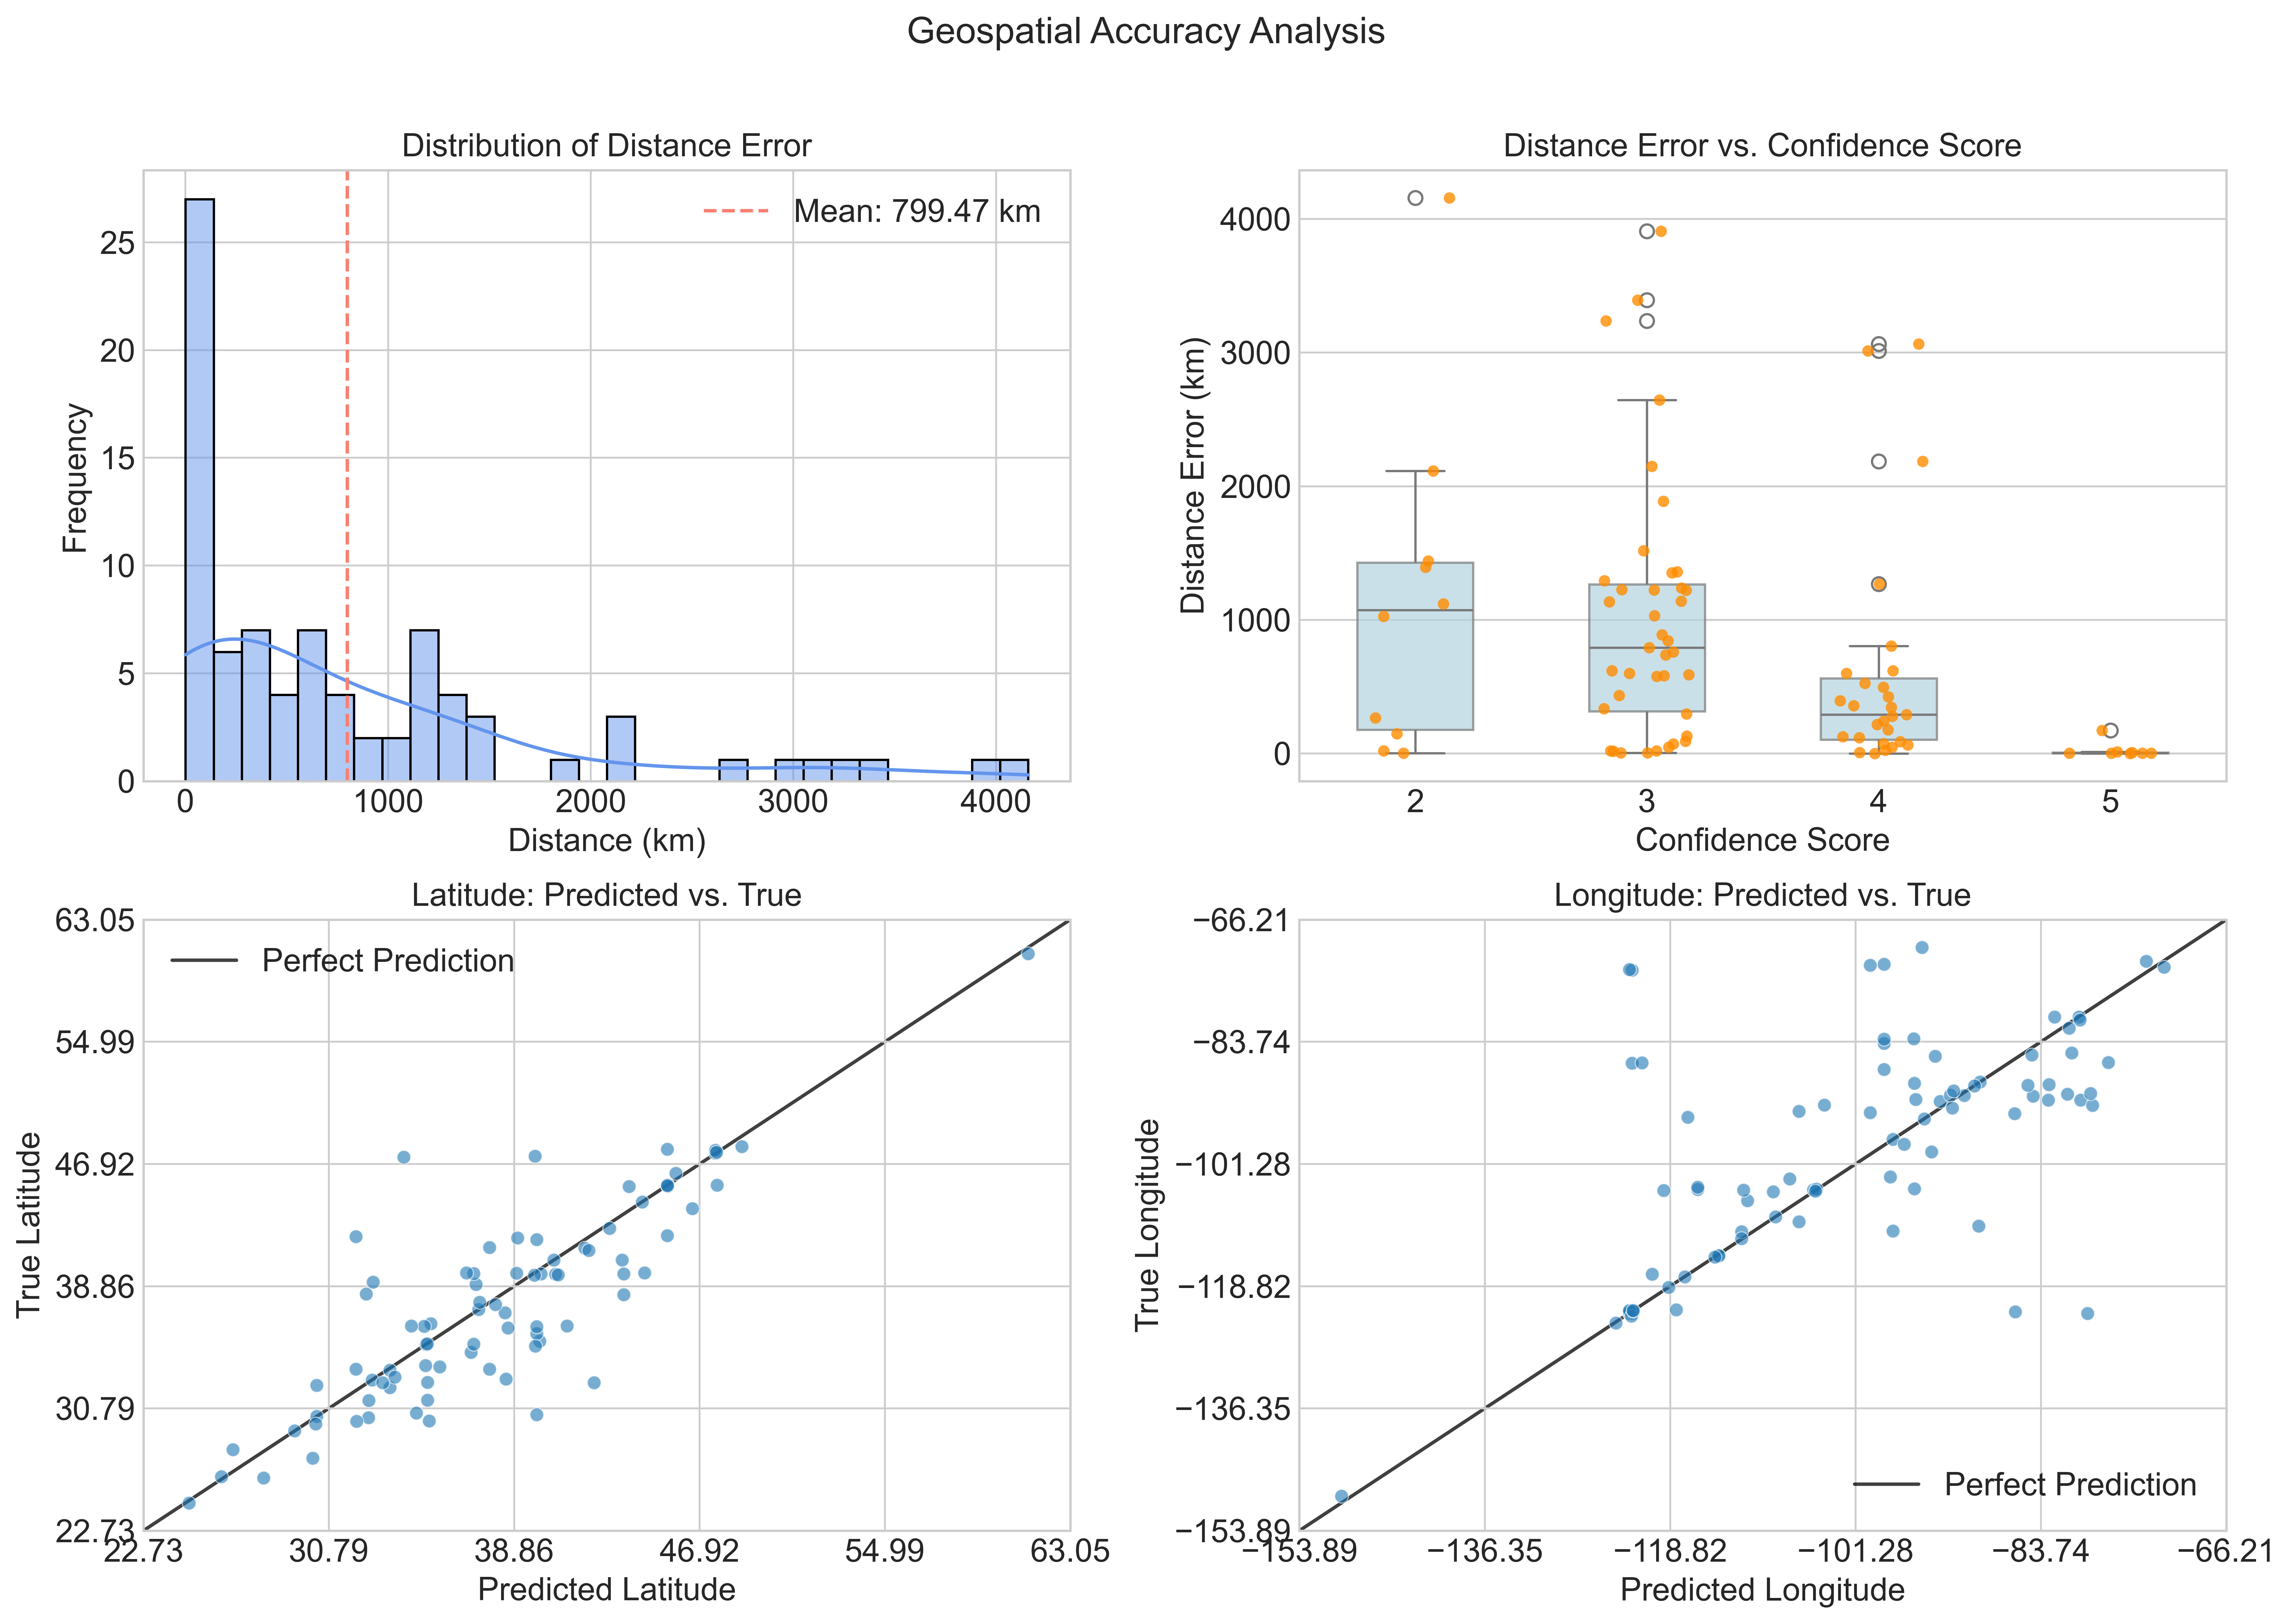

In [8]:
create_visualizations(df1)